In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


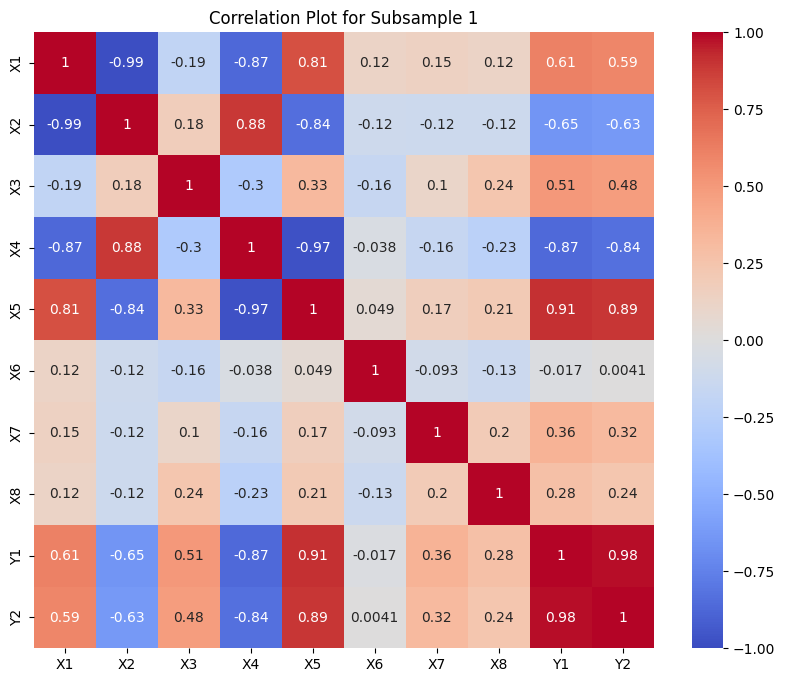

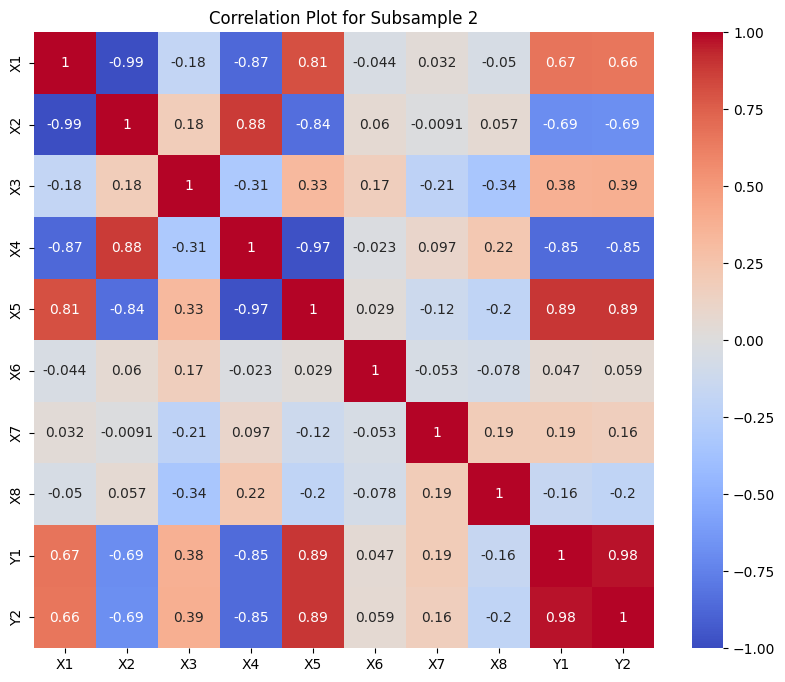

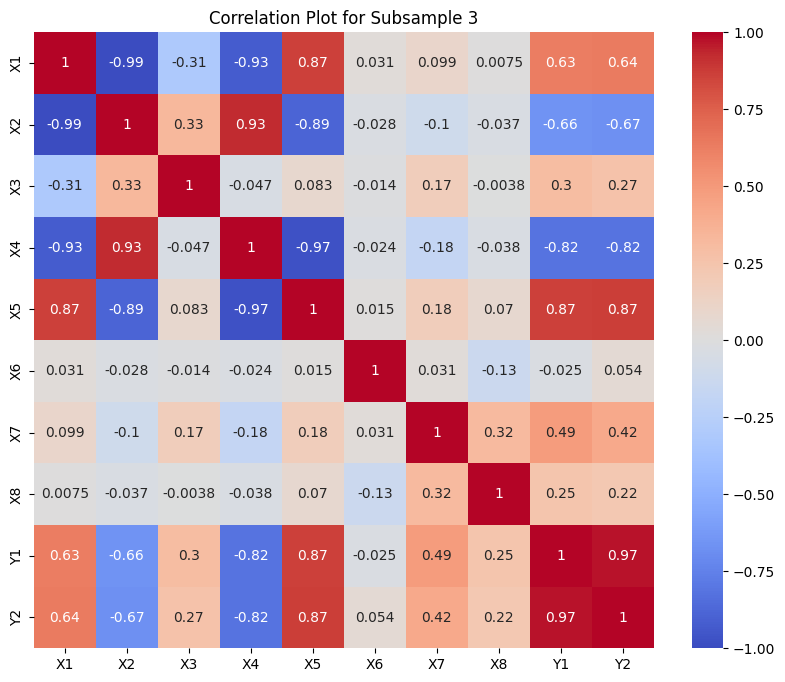

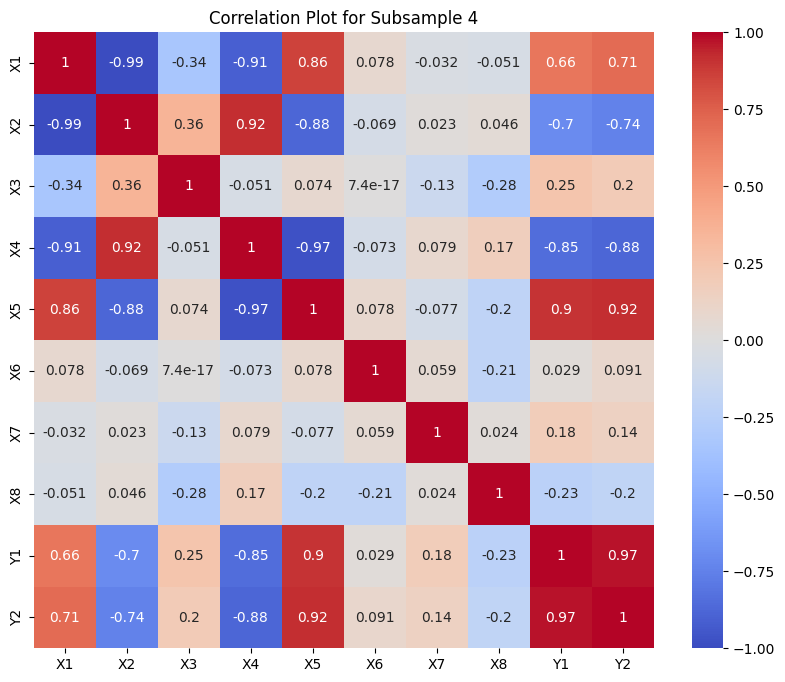

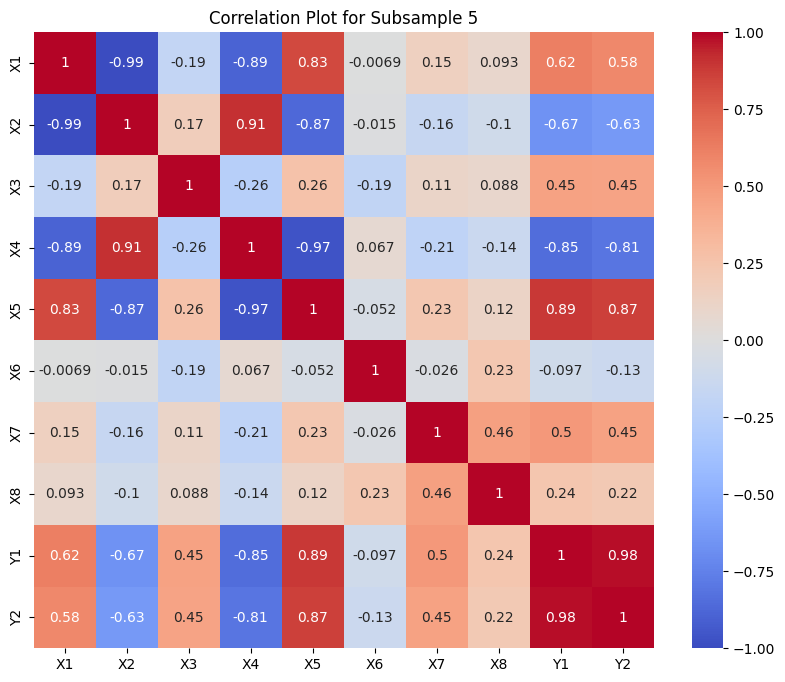

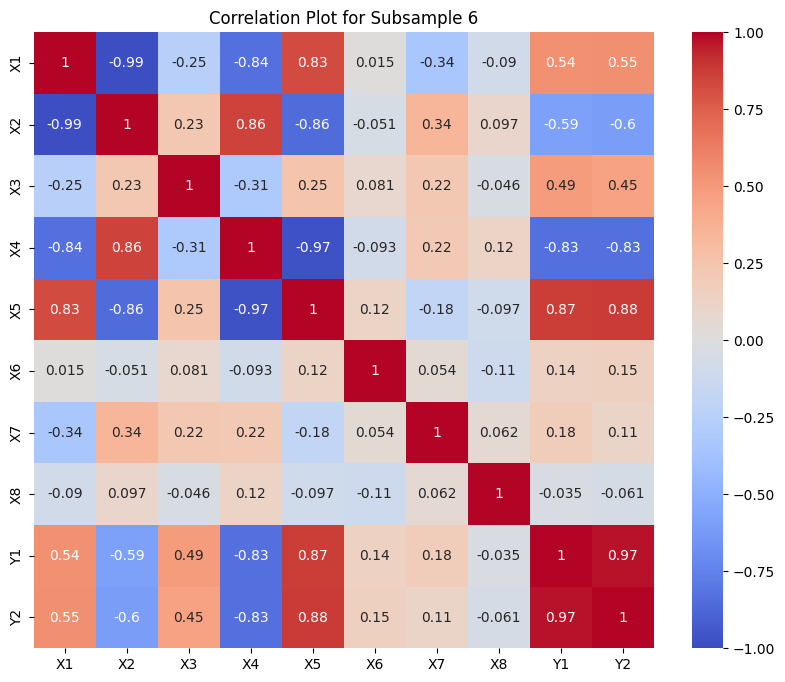

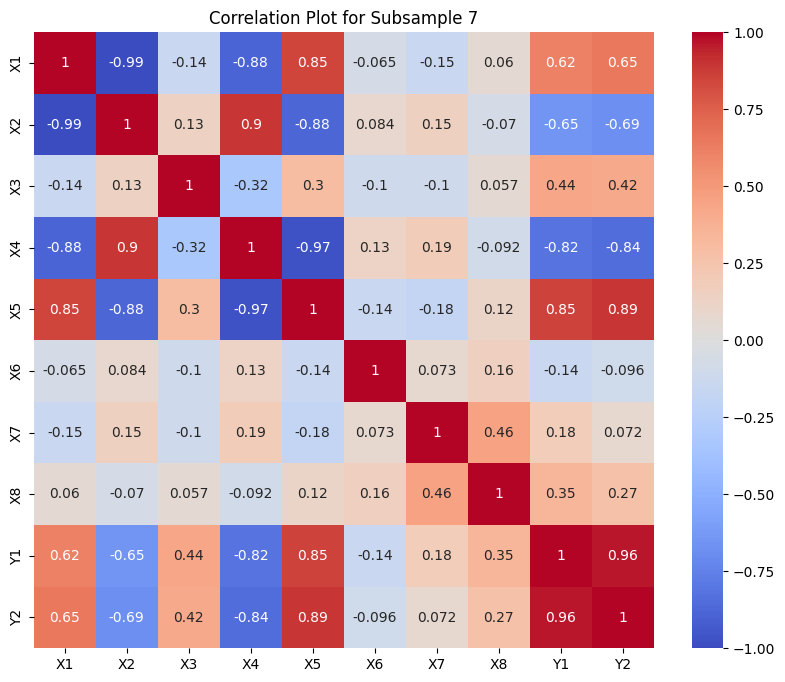

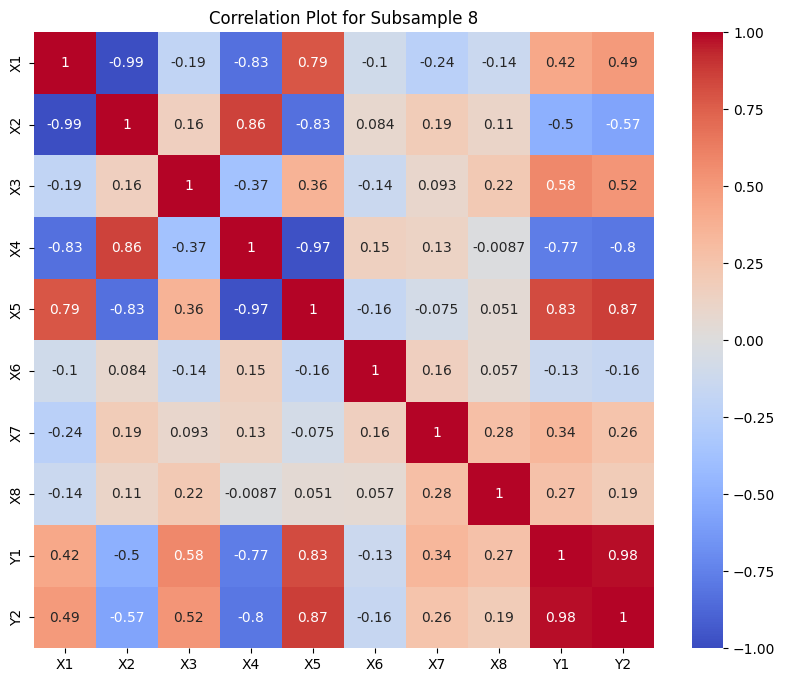

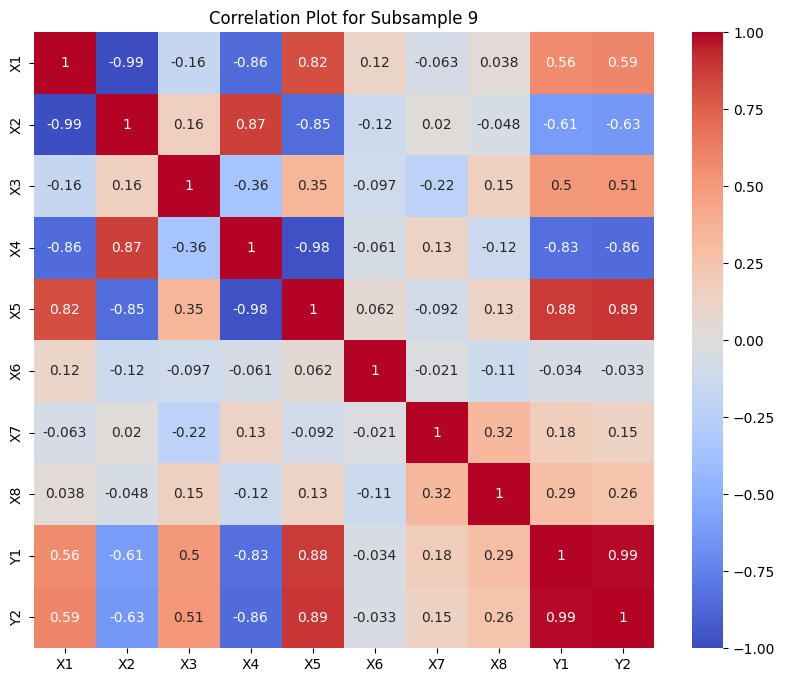

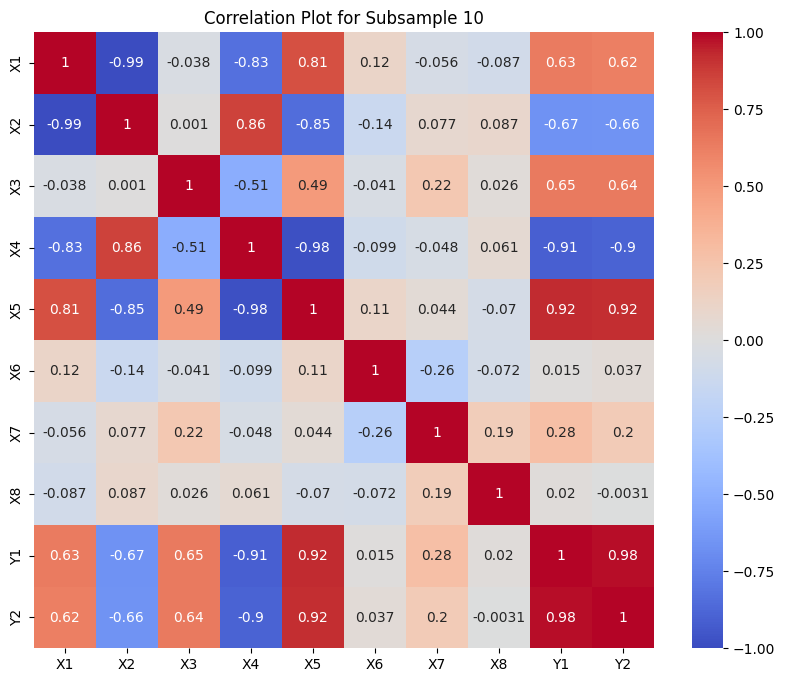

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/DatasetforDA/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Function to create correlation plots for subsamples
def create_correlation_plots(data, n_samples=10, sample_size=50):
    np.random.seed(42)
    for i in range(n_samples):
        sample = data.sample(n=sample_size)
        plt.figure(figsize=(10, 8))
        sns.heatmap(sample.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Plot for Subsample {i+1}')
        plt.show()

# Create correlation plots for 10 subsamples
create_correlation_plots(data)


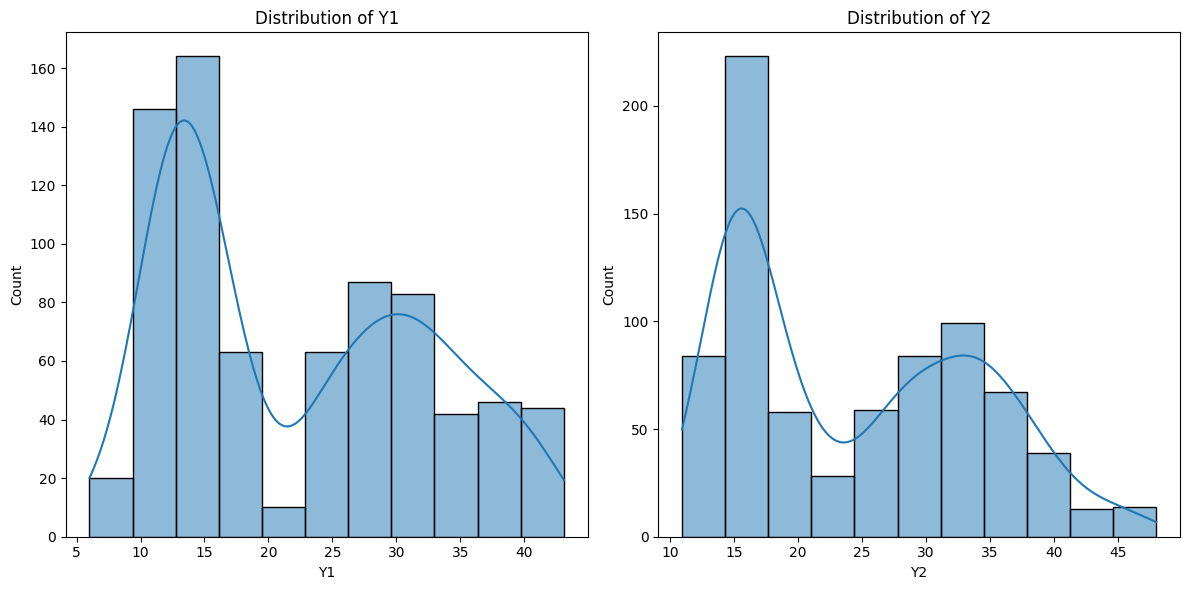

In [6]:
# Checking for imbalance in target variables Y1 and Y2

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Y1'], kde=True)
plt.title('Distribution of Y1')

plt.subplot(1, 2, 2)
sns.histplot(data['Y2'], kde=True)
plt.title('Distribution of Y2')

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/DatasetforDA/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Ensure the data is in numeric format
data = data.apply(pd.to_numeric, errors='coerce')

# Function to create pairplots for subsamples
def create_pairplots(data, n_samples=10, sample_size=50):
    np.random.seed(42)
    for i in range(n_samples):
        sample = data.sample(n=sample_size)
        sns.pairplot(sample)
        plt.suptitle(f'Pairplot for Subsample {i+1}', y=1.02)
        plt.show()

# Create pairplots for 10 subsamples
create_pairplots(data)


Output hidden; open in https://colab.research.google.com to view.

<Figure size 1200x1000 with 0 Axes>

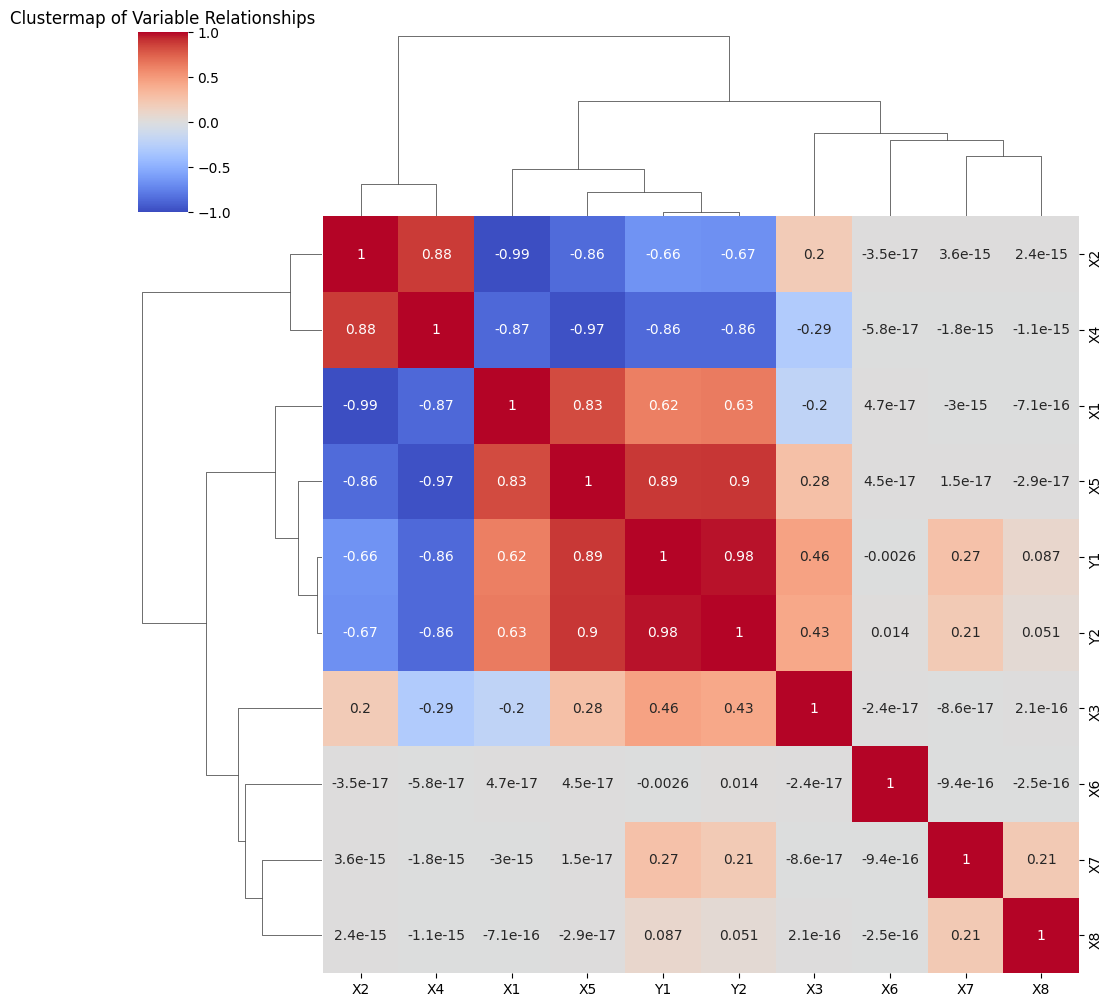

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score




data = data.apply(pd.to_numeric, errors='coerce')

# Create a clustermap to explore the relationships between variables
plt.figure(figsize=(12, 10))
sns.clustermap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Clustermap of Variable Relationships')
plt.show()


In [11]:
X = data.drop(['Y1', 'Y2'], axis=1)
y1 = data['Y1']
y2 = data['Y2']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)



In [12]:
# Train an SVM model for Y1
svr_y1 = SVR()
svr_y1.fit(X_train, y1_train)

# Evaluate the model performance for Y1
y1_pred = svr_y1.predict(X_test)
print('Performance for Y1:')
print('Mean Squared Error:', mean_squared_error(y1_test, y1_pred))
print('R2 Score:', r2_score(y1_test, y1_pred))



Performance for Y1:
Mean Squared Error: 31.972061743238758
R2 Score: 0.6932617986715708


In [13]:
# Train an SVM model for Y2
svr_y2 = SVR()
svr_y2.fit(X_train, y2_train)

# Evaluate the model performance for Y2
y2_pred = svr_y2.predict(X_test)
print('\nPerformance for Y2:')
print('Mean Squared Error:', mean_squared_error(y2_test, y2_pred))
print('R2 Score:', r2_score(y2_test, y2_pred))



Performance for Y2:
Mean Squared Error: 28.640486130796962
R2 Score: 0.690898551453607


In [15]:
# Use GridSearchCV to find the best hyperparameters for Y1
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search_y1 = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_y1.fit(X_train, y1_train)

print('\nBest parameters for Y1:', grid_search_y1.best_params_)


KeyboardInterrupt: 

In [ ]:
# Train the improved model for Y1
svr_y1_best = grid_search_y1.best_estimator_
svr_y1_best.fit(X_train, y1_train)

# Evaluate the improved model performance for Y1
y1_pred_best = svr_y1_best.predict(X_test)
print('Improved Performance for Y1:')
print('Mean Squared Error:', mean_squared_error(y1_test, y1_pred_best))
print('R2 Score:', r2_score(y1_test, y1_pred_best))


In [ ]:
# Use GridSearchCV to find the best hyperparameters for Y2
grid_search_y2 = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_y2.fit(X_train, y2_train)

print('\nBest parameters for Y2:', grid_search_y2.best_params_)


In [ ]:
# Train the improved model for Y2
svr_y2_best = grid_search_y2.best_estimator_
svr_y2_best.fit(X_train, y2_train)



In [ ]:
# Evaluate the improved model performance for Y2
y2_pred_best = svr_y2_best.predict(X_test)
print('Improved Performance for Y2:')
print('Mean Squared Error:', mean_squared_error(y2_test, y2_pred_best))
print('R2 Score:', r2_score(y2_test, y2_pred_best))
